## Table of Contents - **Forecasting Model & Results**

**A. FIT & TUNE FORECASTING MODEL**

  **STEP 1:** Creating train, test data set and standardising x_train and x_test. 
  
  **STEP 2:** K-Nearest Neighbours Model
  
  **STEP 3:** Random Forest Regressor Model
  
  **STEP 4:** Decision Tree Regressor Model
  
  **STEP 5:** Multi-layer Neural Network Model

  **STEP 6:** Ridge Model
  
  **STEP 7:** Lasso Model
  
  **STEP 8:** Support Vector Regression Model
  
  **STEP 9:** Support Vector Regression Model
  
 **B. RESULTS**

  **B.1** Kaggle RMSE on different models
  
  **B.2** Final Score, Rank and Conclusion

## A. Fit and tune a forecasting model

**Step 1: Creating train, test data set and standardising x_train and x_test**

In [ ]:
#Creating the train and test dataset
X_train = df_train_final.drop('price', axis=1)
y_train = df_train_final['price']
X_test = df_test_final.drop('price', axis=1)

#Standardising x_train and x_test
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

**Step 2: K-Nearest Neighbours Model**

In [ ]:
#KNR Model

from sklearn.neighbors import KNeighborsRegressor

#Creating instance of the K Nearest Neighbours model 
knr_model = KNeighborsRegressor()


#Create a dictionary of all values we want to test for n_neighbors
param_grid_knr = {'n_neighbors': np.arange(1, 25)}

#Using GridSearch Cross Validation
grid_search_knr = GridSearchCV(estimator=knr_model, param_grid=param_grid_knr, cv=10, scoring='neg_mean_squared_error')
                               
#Fitting the model with GridSearch
grid_search_knr.fit(X_train_scaled, y_train)

#Getting the best model and hyperparameters
best_knr_model = grid_search_knr.best_estimator_
best_params_knr = grid_search_knr.best_params_

print(best_params_knr)

#Fitting the best model on the training data
best_knr_model.fit(X_train_scaled, y_train)
                               

#Predicting the target variable for the test data
y_pred_knr = best_knr_model.predict(X_test_scaled)


#Using fitted model to create price prediction
df_test['price'] = y_pred_knr
                               
#Make into CSV for Kaggle submission
df_test[['ID', 'price']].to_csv('predictions_knr.csv', index=False)


mse_scores = -cross_val_score(best_knr_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_knr = np.sqrt(np.mean(mse_scores))
print("Root Mean Squared Error (RMSE):", rmse_knr)

**Step 3: Random Forest Regressor Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV


#Defining the parameter grid for tuning hyperparameters
param_grid_rf = {
    'n_estimators': [20, 50, 100],  # number of trees in the forest
    'max_depth': [2, 4, 5],  # maximum depth of the trees
    'min_samples_split': [2,3, 5],  # minimum number of samples required to split an internal node
}


#Creating instance of the Random Forest model
rf_model = RandomForestRegressor(random_state=1)


#Using GridSearch Cross Validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=10, scoring='neg_mean_squared_error')

#Fitting the model with GridSearch
grid_search_rf.fit(X_train_scaled, y_train)

#Getting the best model and hyperparameters
best_rf_model = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_
print(best_params_rf)

#Fitting the best model on the training data
best_rf_model.fit(X_train_scaled, y_train)

#Predicting the target variable for the test data
y_pred_rf = best_rf_model.predict(X_test_scaled)

#Using fitted model to create price prediction
df_test['price'] = y_pred_rf

#Make into CSV for Kaggle submission
df_test[['ID', 'price']].to_csv('predictions_rf.csv', index=False)


mse_scores = -cross_val_score(best_rf_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_rf = np.sqrt(np.mean(mse_scores))
print("Root Mean Squared Error (RMSE):", rmse_rf)

**Step 4: Decision Tree Regressor Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor


#Defining the parameter grid for tuning hyperparameters
param_grid_dt = {
    'max_depth': [None, 5, 10],  # maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # minimum number of samples required to split an internal node
}

#Creating instance of the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=1)

#Using GridSearch Cross Validation
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=10, scoring='neg_mean_squared_error')

#Fitting the model with GridSearch
grid_search_dt.fit(X_train_scaled, y_train)

#Getting the best model and hyperparameters
best_dt_model = grid_search_dt.best_estimator_
best_params_dt = grid_search_dt.best_params_

print(best_params_dt)

#Fitting the best model on the training data
best_dt_model.fit(X_train_scaled, y_train)

#Predicting the target variable for the test data
y_pred_dt = best_dt_model.predict(X_test_scaled)

#Using fitted model to create price prediction
df_test['price'] = y_pred_dt

#Make into CSV for Kaggle submission
df_test[['ID', 'price']].to_csv('predictions_dt.csv', index=False)


mse_scores = -cross_val_score(best_dt_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_dt = np.sqrt(np.mean(mse_scores))
print("Root Mean Squared Error (RMSE):", rmse_dt)

**Step 5: Multi-layer Neural Network Model** 

In [ ]:
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings('ignore')

#Defining the parameter grid for tuning hyperparameters
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (100, 50), (200, 100)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

#Creating instance of the MLP model
mlp_model = MLPRegressor(max_iter=30, random_state=1)

#Using GridSearch Cross Validation
grid_search_mlp = GridSearchCV(estimator=mlp_model, param_grid=param_grid_mlp, cv=10, scoring='neg_mean_squared_error')
grid_search_mlp.fit(X_train_scaled, y_train)

#Getting the best model and hyperparameters
best_mlp_model = grid_search_mlp.best_estimator_
best_params_mlp = grid_search_mlp.best_params_

print(best_params_mlp)

#Fitting the best model on the training data
best_mlp_model.fit(X_train_scaled, y_train)

#Predicting the target variable for the test data
y_pred_mlp = best_mlp_model.predict(X_test_scaled)

#Using fitted model to create price prediction
df_test['price'] = y_pred_mlp

#Make into CSV for Kaggle submission
df_test[['ID', 'price']].to_csv('predictions_mlp.csv', index=False)


mse_scores = -cross_val_score(best_mlp_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_mlp = np.sqrt(np.mean(mse_scores))
print("Root Mean Squared Error (RMSE):", rmse_mlp)

**Step 6: Ridge Model** 

In [ ]:
from sklearn.linear_model import Ridge

#Defining the parameter grid for tuning hyperparameter alpha 
param_grid_rdg = {'alpha':  [1e-15,1e-10,1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1,5, 10,15,20,25,30,35,40,45,50,55, 100, 110,120,130,140,150,200]}

#Creating instance of the Ridge model
rdg_model = Ridge()

#Using GridSearch Cross Validation
grid_search_rdg = GridSearchCV(estimator=rdg_model, param_grid=param_grid_rdg, cv=10, scoring='neg_mean_squared_error')
grid_search_rdg.fit(X_train_scaled, y_train)

#Getting the best model and hyperparameters
best_rdg_model = grid_search_rdg.best_estimator_
best_params_rdg = grid_search_rdg.best_params_
print(best_params_rdg)

#Fitting the best model on the training data
best_rdg_model.fit(X_train_scaled, y_train)

#Predicting the target variable for the test data
y_pred_rdg = best_rdg_model.predict(X_test_scaled)

#Using fitted model to create price prediction
df_test['price'] = y_pred_rdg

#Make into CSV for Kaggle submission
df_test[['ID', 'price']].to_csv('predictions_rdg.csv', index=False)



mse_scores = -cross_val_score(best_rdg_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_rdg = np.sqrt(np.mean(mse_scores))
print("Root Mean Squared Error (RMSE):", rmse_rdg)

**Step 7: Lasso Model** 

In [ ]:
from sklearn.linear_model import Lasso

#Defining the parameter grid for tuning hyperparameter alpha levels
param_grid_lso = {'alpha':  [1e-15,1e-10,1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1,5, 10,15,20,25,30,35,40,45,50,55,100,110,120,130,140,150,200]}

#Creating instance of the Lasso model
lso_model = Lasso(max_iter=30)

#Using GridSearch Cross Validation
grid_search_lso = GridSearchCV(estimator=lso_model, param_grid=param_grid_lso, cv=10, scoring='neg_mean_squared_error')
grid_search_lso.fit(X_train_scaled, y_train)

#Getting the best model and hyperparameters
best_lso_model = grid_search_lso.best_estimator_
best_params_lso = grid_search_lso.best_params_
print(best_params_lso)

#Fitting the best model on the training data
best_lso_model.fit(X_train_scaled, y_train)

#Predicting the target variable for the test data
y_pred_lso = best_lso_model.predict(X_test_scaled)

#Using fitted model to create price prediction
df_test['price'] = y_pred_lso
#Make into CSV for Kaggle submission
df_test[['ID', 'price']].to_csv('predictions_lso.csv', index=False)



mse_scores = -cross_val_score(best_lso_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_lso = np.sqrt(np.mean(mse_scores))
print("Root Mean Squared Error (RMSE):", rmse_lso)

**Step 8: Support Vector Regression Model** 

In [ ]:
from sklearn.svm import SVR

#Defining the parameter grid for hyperparameter tuning
param_grid_svr = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 'scale']
}
#Creating instance of the SVR model
svr_model = SVR()

#Using GridSearch Cross Validation
grid_search_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid_svr, cv=10, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train_scaled, y_train)

#Getting the best model and hyperparameters
best_svr_model = grid_search_svr.best_estimator_
best_params_svr = grid_search_svr.best_params_

print(best_params_svr)

#Fitting the best model on the training data
best_svr_model.fit(X_train_scaled, y_train)

#Predicting the target variable for the test data
y_pred_svr = best_svr_model.predict(X_test_scaled)

#Using fitted model to create price prediction
df_test['price'] = y_pred_svr

#Make into CSV for Kaggle submission
df_test[['ID', 'price']].to_csv('predictions_svr.csv', index=False)


mse_scores = -cross_val_score(best_svr_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_svr = np.sqrt(np.mean(mse_scores))
print("Root Mean Squared Error (RMSE):", rmse_svr)

## B. Results

**B.1 Kaggle RMSE on different models**

## Kaggle RMSE    
**KNR**: 3334.92689  
**Random Forest**: 3424.03348  
**Decision Tree**: 3454.42914  
**MLP**: 3421.70809  
**Ridge**: 3417.7776  
**Lasso**: 3417.7776  
**SVR**: 3422.39398  

In [ ]:
#Comparison with Kaggle rmse
#Extracting the data from Kaggle Score
data = {'KNR':3334.92689, 'Random Forest':3424.03348 , 'Decision Tree':3454.42914,
        'MLP':3421.70809 , 'Ridge': 3417.7776, 'Lasso':3417.7776, 'SVR': 3422.39398}

#Taking the data from the dictionary created
courses = list(data.keys())
values = list(data.values())

#Creating a figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 7))

#Plotting the line chart
ax.plot(courses, values, color='blue', linewidth=2)

# Set labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Kaggle RMSE')
ax.set_title('Kaggle RMSE Results Using Different Models')

# Display the line chart
plt.show()

In [ ]:
#Extracting the data from Calculated Score
data = {'KNR':rmse_knr,'Random Forest':rmse_rf, 'Decision Tree':rmse_dt,
        'MLP':rmse_mlp , 'Ridge': rmse_rdg, 'Lasso':rmse_lso, 'SVR': rmse_svr}

#Taking the data from the dictionary created
courses = list(data.keys())
values = list(data.values())

#Creating a figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 7))

#Plotting the line chart
ax.plot(courses, values, color='green', linewidth=2)

# Set labels and title
ax.set_xlabel('Models')
ax.set_ylabel('RMSE')
ax.set_title('Calculated RMSE Results Using Different Models')

# Display the line chart
plt.show()

**5.2 Final Score, Rank and Conclusion**

Our best score was using the KNR model as shown above which had resulted in the score of 3334.93 (2dp) which will be our chosen submission as shown below.
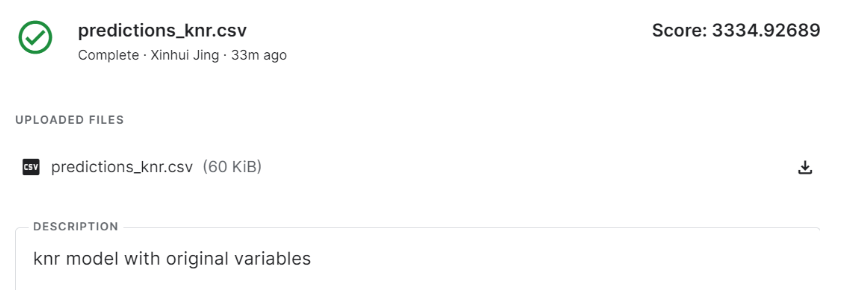
After many experiments with different hyperparameters, adjusted variables for regression and a comparison of the different model's score, we find that KNR results produces the lowest RMSE and thus, our best model. 

However, we see that the RMSE calculated with KNR is the highest for the RMSE calculated using the y_train showing a stark contrast between the two. Furthermore, it seems that MLP, Ridge Lasso and SVR are more consistent with their score fluctuation. Therefore, as our best score on Kaggle is not consistent with the scores calculated here, the models may be overfitted or that the RMSE calculated using y_train is biased as it uses data that has been already seen, or even the model differences. 


Currently rank on Kaggle is Rank 1 as of 1/06/2023 4pm.
